# <font color=purple>Problem Statement

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate & home office.

 

As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## <font color=purple>1.  Import necessary libraries</font>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns



## <font color=purple> 2. Import time series data: Global Superstore Data

In [ ]:
# Read the given CSV file, and view some sample records
retail= pd.read_csv('../input/global-superstore/GlobalSuperstoreData.csv')
retail.head()


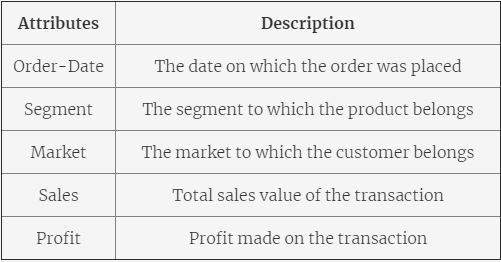

In [ ]:
#Determine the number of rows and columns
retail.shape

#### <font color=green> There are 51290 rows and 5 columns in the data set

In [ ]:
#Checking the datatypes
retail.info()

In [ ]:
#summary of all the numeric columns in the dataset
retail.describe()

## <font color=purple> 3. Data Preparation

- ### <font color=blue> 3.1 Creating a new column Market_Segment

In [ ]:
retail['Market_Segment']= retail['Market']+'_' +retail['Segment']
retail.head()

In [ ]:
retail.nunique().sort_values()

- #### <font color=green>We can see that the store caters to 7 different geographical market segments and 3 major customer segments
- #### <font color=green>There are 21 unique "Market-Segments"  

- ### <font color=blue>3.2. Lets see which are the unique market segments, customer segments and Market-Segments

In [ ]:
plt.figure(figsize=(12,5))
print(retail.Market.value_counts())
sns.countplot(retail['Market'], palette='rocket')
plt.title('7 Geographical Market Segments', fontweight='bold', size=20)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
print(retail.Segment.value_counts())
sns.countplot(retail['Segment'], palette='husl')
plt.title('3 Major Customer Segments',fontweight='bold', size=20)
plt.show()

In [ ]:
plt.figure(figsize=(18,6))
print(retail.Market_Segment.value_counts())
sns.countplot(retail['Market_Segment'], palette='ocean')
plt.title('21 Unique Market-Segments',fontweight='bold', size=20)
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

#### <font color=green> We can see from the plot APAC_Consumer has the highest count

### <font color=blue>Market- Segment vs Profit

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=retail, palette='Paired')
plt.title('Market vs Profit', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

- #### <font color=green> We can see that Canada and APAC markets with the segments Consumer, Corporate and Home office have more profit
- #### <font color=green>    Africa and EMEA markets have less profit

### <font color=blue>Market- Segment vs Sales

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=retail, palette='husl')
plt.title('Market vs Sales', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

- #### <font color=green> APAC marketis having higher Sales in all the three segments
- #### <font color=green> EMEA and Africa have less sales    

- ### <font color=blue>3.3.  Lets drop columns 'Market' and 'Segment'

In [ ]:
retail=retail.drop(['Market','Segment'],axis=1)
retail.head()

- ### <font color=blue> 3.4. Convert the order-date into a date-time format

In [ ]:
#convert the order-date into a date-time format for getting it into the Month-year format
retail['Order Date'] = pd.to_datetime(retail['Order Date']).dt.to_period('m')
retail= retail.sort_values(by=['Order Date'])
retail.head()

In [ ]:
retail.info()

- ###  <font color=blue>3.5. Monthly aggregated transaction data

In [ ]:
retail_profit= retail.pivot_table( index='Order Date',values='Profit', columns='Market_Segment' ,aggfunc='sum')
retail_profit.head()

In [ ]:
retail_profit.shape

#### <font color=green>We got the data for 48 months now for the 21 Market_Segments


## <font color=purple> 3.6 Test-Train Split

In [ ]:
# perform the train-test split such that you take the 42 months as the train data and the 6 months as the test data.
train_len = 42
train = retail_profit[0:train_len] # first 42 months as training set
test = retail_profit[train_len:] # last 6 months as test set

In [ ]:
train.shape

In [ ]:
train.head()

## <font color=purple> 3.7. Calculate the CoV on the profit for each of the 21 market segments on the train data.

- We compare the variance between the segments using the coefficient of variation which will normalise the standard deviation with the mean and give a comparative figure on the basis of which we can identify the most profitable market segment.
- We want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.

In [ ]:
mean=np.mean(train)
std= np.std(train)

CoV_df= pd.DataFrame(mean)
CoV_df['std']= std
CoV_df['CoV'] = std/mean
CoV_df= CoV_df.reset_index()
CoV_df.columns= ['Market_Segment', 'Mean', 'Std', 'CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

In [ ]:
Lowest_CoV_value =min(CoV_df["CoV"])
Lowest_CoV_value

In [ ]:
sns.barplot(x='Market_Segment', y= 'CoV', data=CoV_df, palette='magma')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

- ### <font color=green>We can see that Lowest CoV is 0.52272 
- ### <font color=green>We can infer that the corresponding Marget Segment is "APAC_Consumer"
### The most profitable Market Segment is APAC_Consumer 

## <font color=purple>3.8. Convert the Order-Date column from "DateTime" to "timestamp" 

In [ ]:
retail['Order Date'].dtype

In [ ]:
retail['Order Date'] = retail['Order Date'].astype(str)
retail['Order Date']=pd.to_datetime(retail['Order Date'])

In [ ]:
retail['Order Date'].dtype

- #### <font color=green>Thus, you will get a timestamp for each order date now as well.

## <font color=purple> 3.9.  Filter the Data for Best Market Segment- APAC Consumer

In [ ]:
#Drop the data for the rest 20 market segments and keep only the one for the market segment 
#that you found to be the most consistently profitable.
retail_df= retail[(retail.Market_Segment=='APAC_Consumer')]
retail_df.head()

In [ ]:
retail_df.shape

## <font color=purple> 3.9. Grouping data based on Order date and finding sales

In [ ]:
data=pd.DataFrame(retail_df.groupby("Order Date")['Sales'].sum())
data.head()
#df=retail.groupby('Order Date')
#df=pd.DataFrame(df['Sales'].sum())
#df

In [ ]:
data.shape

# <font color=purple> 4. Time series analysis

- ### <font color=blue>4.1. Plot time series data

In [ ]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold', size=20)
plt.show(block=False)

In [ ]:
data.isnull().sum()

#### <font color=green> There are no misssing values

- ### <font color=blue>4.2. Split time series data into training and test set

In [ ]:
#Perform the train-test split for that market segment that takes the 42 months data as the train data and 
#the 6 months data as the test data.
train_len = 42
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

- ### <font color=blue>4.3. Time series Decomposition

Lets understand how a time series can be split into its various components that is the Trend, Seasonality, and residuals


- ### Additive seasonal decomposition

The individual components can be added to get the time-series data

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive') # additive seasonal index

fig = decomposition.plot()
plt.show()

- ### Multiplicative seasonal decomposition

The individual components can be multiplied to get the time-series data

In [ ]:
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# <font color=purple>5. Build and evaluate time series forecast

Split time series data into training and test set

In [ ]:
#Perform the train-test split for that market segment that takes the 42 months data as the train data and 
#the 6 months data as the test data.
train_len = 42
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

- ## <font color=blue>5.1. Simple time series methods

- ### <font color=blue> Naive Method
    
    **Forecast = Last month’s sales**

In [ ]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1] #Last observation in the train data

- ### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

- #### <font color=green>As we can see in the plot,in order to forecast the sales from month 2014-07 to  2015-01 we we the last or previous month data which is 2014-06
- #### <font color=green> We can see that the forecast for the next six months is the same value(green line) as the last observation of the blue line    

### Calculate RMSE and MAPE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

- ### <font color=blue>Simple average method

**Forecast = Average of all past months’ sales**

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()# Average of past months sales

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method', fontweight='bold')
plt.show()

- #### <font color=green>Forecast of months from 2014-07 to 2015-01 = Average of all past months’ sales
- #### <font color=green> Green line is the average of all the 42 months sales data 
- #### <font color=green>The green line we forecasted is not showing any trend or seasonality while our train and test data had both trend and seasonality     

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

- ### <font color=blue> Simple moving average method

**Forecast= Average of only the last few observations to forecast the future**
 - Reduces unsystematic noise in the data

In [ ]:
y_hat_sma = data.copy()
ma_window = 3  # Considered 3 month window
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

In [ ]:
 plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## <font color=blue> Exponential smoothing methods

### <font color=blue>Simple exponential smoothing

- **The most recent period's demand multiplied by the smoothing factor.**
- It is a time series forecasting method for univariate data without a trend or seasonality.
- The simple exponetial model captures the level of a time series.

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

#### <font color=green>We can see that The simple exponential model captured the level of a time series.

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

### <font color=blue>Holt's Exponential Smoothing 

- Captures both level and trend of a time series in the forecast.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method', fontweight='bold')
plt.show()

#### <font color=green>We can see that the forecast is a straight line, sloping upwards as Holt's method captured both level and trend

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### <font color=blue>Holt Winters' additive method with trend and seasonality

**Forecasts based on level, trend and seasonality of a time series**

In [ ]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

- ### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

#### <font color=green> We can see that we are able to capture good amount of seasonal variation and even the trend

- ### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

#### <font color=green> We can see Holt Winter's Additive methid has the lowest  RMSE and MAPE values. Which means error measures are very less in this model

### <font color=blue>Holt Winter's multiplicative method with trend and seasonality

**Forecast= Multiplies the trended forecast by the seasonality**

In [ ]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

- ### From the Smoothing Techniques performed we can conclude that Holt Winter's Additive Method is giving the better forecast to of the sales for the 6 months, since the predicted sales are closer to the actual sales.
- ### We could also see that the RMSE and MAPE values is the least among all the methods done above.

## <font color=blue>5.2. Auto Regressive methods

In an autoregressive model, the regression technique is used to formulate a time series problem. In order to implement autoregressive models, we forecast future observations using a linear combination of past observations of the same variable 

### Stationarity vs non-stationary time series

In [ ]:
data['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

### <font color=blue> Augmented Dickey-Fuller (ADF) test

Null Hypothesis $(H0)$: The series is not stationary      $p-value > 0.05 $

Alternate Hypothesis:$(H1)$ The series is stationary   $p-value <= 0.05 $

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

- #### <font color=brown> We can see that p-value is 0.011, which is less than 0.05
-  #### <font color=brown> So The series is stationary. And Reject the null hypothesis $(H0)$

### <font color=blue>Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

Null Hypothesis $(H0)$: The series is stationary      $p-value > 0.05 $

Alternate Hypothesis:$(H1)$ The series is not stationary   $p-value <= 0.05 $

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

- #### <font color=brown> p-value is 0.024 < 0.05
- #### <font color=brown>  Which means the series is not Stationary                                                

**The two tools to convert a non-stationary series into stationary series are as follows:**

- Differencing
- Transformation

### <font color=blue>Box Cox transformation to make variance constant

- **Box-Cox Transformation makes the variance constant in a Time series.**

In [ ]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

### <font color=purple>Differencing to remove trend

- **Differencing is performed by subtracting the previous observation from the current observation.**
- **Differencing can remove both Trend and seasonality in a Time series.**

In [ ]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

- #### <font color=green>The series looks Stationary 
- #### <font color=green> The fluctuations are under constant limits
- #### <font color=green>The mean is also centered around zero

In [ ]:
data_boxcox_diff.dropna(inplace=True)

In [ ]:
data_boxcox_diff.tail()

### <font color=blue>Augmented Dickey-Fuller (ADF) test

In [ ]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

- #### <font color=brown> p-value is 0.0001 < 0.05, Reject the null hypothesis $(H0)$
- #### <font color=brown> The series is stationary                                            

### <font color=blue>Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [ ]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

- #### <font color=brown> p-value is 0.100 >= 0.05,  Fail to reject the null hypothesis  $(H0)$
- #### <font color=brown> The series is stationary                                            

### <font color=black>Thus after performing the Stationarity Tests we can see that we are able to convert a non-stationary series into a stationary series to build an Auto Regressive model.

### <font color=blue>Autocorrelation function (ACF)

- The correlation of the time series observations with values of the same series at previous times(lags) is called autocorrelation.
- ACF describes the autocorrelation between observation and another observation at a prior time step that includes direct and indirect dependence information.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

### <font color=blue>Partial autocorrelation function (PACF)

- The PACF only describes the direct relationship between an observation and its lag.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [ ]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

train_data_boxcox_diff

###  <font color=black>We will directly use p=1, q=1 and d=1 as the forecasts are relatively better for these values.

## <font color=blue>Auto regression method (AR)

- It models the future observation as a linear regression of one or more past observations.
- The parameter of the autoregressive model 'p' is calculated from the Partial Autocorrelation Function plot.
- Select p as the highest lag where partial autocorrelation is significantly high

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

### Recover original time series

In [ ]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

#### <font color=green> From the plot we can see that we are able to capture trend in the forecast but could not cature the seasonality

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

#### <font color=green> The RMSE and MAPE values are slightly high again. 

### <font color=blue>Moving average method (MA)

- The Moving Average Model models the future forecasts using past forecast errors in a regression-like model.
- This model has a parameter ‘q’ called window size over which linear combination of errors are calculated.
- q is calculated from the Autocorrelation function plot. Select q as the highest lag beyond which autocorrelation dies down

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

### Recover original time series

In [ ]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(data['Sales'][:train_len], label='Train')
plt.plot(data['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()

#### <font color=green> We are able to capture trend but not seasonality in the forecast

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

#### <font color=green> The RMSE and MAPE values are high which means too many errors

### <font color=blue>Auto regression moving average method (ARMA)

- A time series that exhibits the characteristics of an $AR(p)$ and/or $MA(q)$ process can be modelled using an $ARMA(p,q)$ model
- It models the future observation as linear regression of one or more past observations and past forecast errors.



In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

### Recover original time series

In [ ]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( data['Sales'][:train_len-1], label='Train')
plt.plot(data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

#### <font color=green>ARMA model captured Trend but no seasonality

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

#### <font color=green> We can see high values of MAPE and RMSE
    

### <font color=blue>Auto regressive integrated moving average (ARIMA)

- ARIMA model has three parameters
- p: Highest lag included in the regression model
- d: Degree of differencing to make the series stationary
- q: Number of past error terms included in the regression model

- 'd' is the differencing parameter. If d is 1, that means the series now has slope 0 and thus will have no trend. That means, the time series initially had trend.

In [ ]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))# p,d,q
model_fit = model.fit()
print(model_fit.params)

### Recover original time series forecast

In [ ]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### <font color=blue>Seasonal auto regressive integrated moving average (SARIMA)

- SARIMA Model has both non seasonal elements and seasonal elements.
- SARIMA brings all the features of an ARIMA model with an extra feature - seasonality. 
- SARIMA has six parameters along with seasonality.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

### Recover original time series forecast

In [ ]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

#### <font color=green> The forecast captured both trend and seasonality

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

- #### <font color=green> Among all the methods done in the ARIMA above, we can conclude that forecast done using SARIMA method  is able to predict the sales closer to the actual values 
- #### <font color=green> RMSE and  MAPE values for this method is the least among all the methods done    

# <font color=purple>6. Conclusion

- ### <font color=blue> Thus we can conclude that, <font color=brown> Holt Winters additive method <font color=blue>is the best forecasting method in the smoothing technique
- ### <font color=blue> And  <font color=brown>SARIMA - Seasonal Autoregressive Integrated moving average <font color=blue>is the best method in  ARIMA set of techniques.  